# SMS Detection

In [ ]:
ID:
Email:
Name: 

# The Goal of this tutorial is to experiment with Natrual Language Processing (NLP)

1. Data exploration -what did you learn? [20 points]

In [1]:
import pandas as pd
df= pd.read_csv("spam.csv", encoding='latin1')

In [2]:
df = df.rename(columns={"v1": "labels", "v2": "text"})[["labels","text"]]

In [3]:
import numpy as np 
np.unique(df.labels) 

array(['ham', 'spam'], dtype=object)

In [4]:
df.head

<bound method NDFrame.head of      labels                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

## A. Count Vectorizer - Convert a collection of text documents to a matrix of token counts.


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
corpus = [ 'This is the first document.', 'This document is the second document.', 
          'And this is the third one.', 'Is this the first document?' ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus) 
print("Feature names with 1-gram word: ",vectorizer.get_feature_names_out() )
print("Vectorizer Array: ")
print(X.toarray())
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus) 
print("Feature names with sliding window of 2-gram: ",vectorizer2.get_feature_names_out() )
print("Vectorizer2 Array: ")
print(X2.toarray())


Feature names with 1-gram word:  ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Vectorizer Array: 
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
Feature names with sliding window of 2-gram:  ['and this' 'and this is' 'document is' 'document is the' 'first document'
 'is the' 'is the first' 'is the second' 'is the third' 'is this'
 'is this the' 'second document' 'the first' 'the first document'
 'the second' 'the second document' 'the third' 'the third one'
 'third one' 'this document' 'this document is' 'this is' 'this is the'
 'this the' 'this the first']
Vectorizer2 Array: 
[[0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0]
 [1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1]]


## The problem with CountVectorizer is that commmon words are getting a higher importance

# Term Frequency - Inverse Document Frequency (TF-IDF)

TF*IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). 
Each word or term that occurs in the text has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.


#### TF*IDF algorithm is used to weigh a keyword in any content and assign importance to that keyword based on the number of times it appears in the document. 
#### IDF (inverse document frequency) of a word is the measure of how significant that term is in the whole corpus.
#### Wt,d = TFt,d log (N/DFt)
#### TFt,d is the number of occurrences of t in document d.
#### DFt is the number of documents containing the term t.
#### N is the total number of documents in the corpus.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer 
corpus = [ 'This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?'] 
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(corpus)

print("Feature names with 1-gram word: ",vectorizer.get_feature_names_out() )
print("Vectorizer Array: ")
print(X.toarray())

Feature names with 1-gram word:  ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Vectorizer Array: 
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


2. Calculate TFIDF features [10 points]
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

#### 3. what is the problem with TFIDF or Vectorizer with large datasets? [no points]

# Feature Selection

#### Assume m features and we want to select k features.  m=20 k=5 --> 15,504 combinations


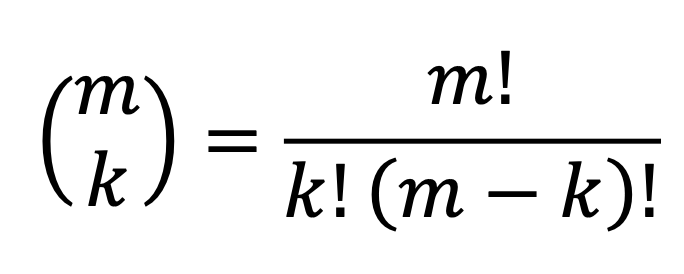

F1. VarianceThreshold

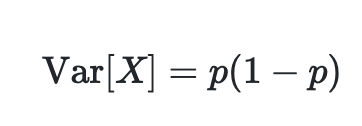

In [27]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

F2. SelectKBest

In [35]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
print("Current shape:", X.shape)
skb = SelectKBest(chi2, k=2)
X_new = skb.fit_transform(X, y)

print("New shape:", X_new.shape)


Current shape: (150, 4)
New shape: (150, 2)


In [44]:
skb.pvalues_,skb.get_feature_names_out(),skb.get_support()

(array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]),
 array(['x2', 'x3'], dtype=object),
 array([False, False,  True,  True]))

F3. Tree-based feature selection

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
print(X.shape)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print("feature importance: ", clf.feature_importances_  )
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(150, 4)
feature importance:  [0.08966923 0.0663703  0.4160158  0.42794467]


(150, 2)

3.1. Create dataset using feature selection method for your choice [10 points]

f4. Principal component analysis (PCA)

In [52]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


3.2. Create alternative dataset using using PCA [10 points]


3.3 what is the difference between PCA and feature selection [10 points]

4. Based on supervised learning compare between 3.1 and 3.2  [10 points]

5. Can you improve the results shown in  (4) [30 points]

6. Word2Vec

In [53]:
# how to install
!pip install --upgrade gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.6 MB/s eta 0:00:00


In [66]:
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [68]:
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
X = df.drop('labels', axis=1)  # Features
y = df['labels']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Word2Vec model
model = gensim.models.Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)



In [78]:
from gensim.corpora import Dictionary

dictionary = Dictionary(X_train)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [ ]:
# Test the model: Get the vector for a word
word = "Go"
word_vector = model.wv[word]

# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
transformed_vector = pca.fit_transform([word_vector])

# Plotting
plt.scatter(transformed_vector[:,0], transformed_vector[:,1])
plt.title(f"2D representation of Word2Vec vector for '{word}'")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [59]:
print(model)

Word2Vec<vocab=12, vector_size=100, alpha=0.025>


In [86]:
X_train

,text
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...
...,...
3772,I came hostel. I m going to sleep. Plz call me...
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [100]:
sentences = X_train.values.tolist()
words_list = [sentence[0].split() for sentence in sentences]


In [101]:
words_list

[['No',
  "I'm",
  'in',
  'the',
  'same',
  'boat.',
  'Still',
  'here',
  'at',
  'my',
  'moms.',
  'Check',
  'me',
  'out',
  'on',
  'yo.',
  "I'm",
  'half',
  'naked.'],
 ['(Bank',
  'of',
  'Granite',
  'issues',
  'Strong-Buy)',
  'EXPLOSIVE',
  'PICK',
  'FOR',
  'OUR',
  'MEMBERS',
  '*****UP',
  'OVER',
  '300%',
  '***********',
  'Nasdaq',
  'Symbol',
  'CDGT',
  'That',
  'is',
  'a',
  '$5.00',
  'per..'],
 ['They', 'r', 'giving', 'a', 'second', 'chance', 'to', 'rahul', 'dengra.'],
 ['O', 'i', 'played', 'smash', 'bros', '&lt;#&gt;', 'religiously.'],
 ['PRIVATE!',
  'Your',
  '2003',
  'Account',
  'Statement',
  'for',
  '07973788240',
  'shows',
  '800',
  'un-redeemed',
  'S.',
  'I.',
  'M.',
  'points.',
  'Call',
  '08715203649',
  'Identifier',
  'Code:',
  '40533',
  'Expires',
  '31/10/04'],
 ['G', 'says', 'you', 'never', 'answer', 'your', 'texts,', 'confirm/deny'],
 ['88066', 'FROM', '88066', 'LOST', '3POUND', 'HELP'],
 ['Okey',
  'dokey,',
  'i\x89Û÷ll',
  

In [95]:
sentences

[["No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked."],
 ['(Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..'],
 ['They r giving a second chance to rahul dengra.'],
 ['O i played smash bros  &lt;#&gt;  religiously.'],
 ['PRIVATE! Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points. Call 08715203649 Identifier Code: 40533 Expires 31/10/04'],
 ['G says you never answer your texts, confirm/deny'],
 ['88066 FROM 88066 LOST 3POUND HELP'],
 ['Okey dokey, i\x89Û÷ll be over in a bit just sorting some stuff out.'],
 ['Why i come in between you people'],
 ['Wah lucky man... Then can save money... Hee...'],
 ['Much better now thanks lol'],
 ['Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.'],
 ["I'm coming home 4 dinner."],
 ['Ok...'],
 ['Can Ì_ all decide faster cos my sis going 

In [97]:
sentences = X_train.values.tolist().split(" ")
[word for sentence in sentences for word in sentences.split(" ")]

AttributeError: 'list' object has no attribute 'split'

In [103]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
X = df.drop('labels', axis=1)  # Features
y = df['labels']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sentences = X_train.values.tolist()
sentence = [sentence[0].split() for sentence in sentences]

# Train a Word2Vec model
model = Word2Vec(sentences=sentence, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec.model")

# Load model (optional, if you need to load it in a different context)
model = Word2Vec.load("word2vec.model")

# Inference
# Replace 'word' with the word you want to infer
word = "is"
if word in model.wv:
    vector = model.wv[word]
    print(f"Vector for '{word}': {vector}")
else:
    print(f"'{word}' not in vocabulary.")

# Finding similar words
# Replace 'word' with the word you want to find similar words for
word = "sentence"
if word in model.wv:
    similar_words = model.wv.most_similar(word)
    print(f"Words similar to '{word}': {similar_words}")
else:
    print(f"'{word}' not in vocabulary.")


Vector for 'is': [-3.5126612e-01  9.6513057e-01  3.1737946e-02  4.5765404e-02
 -8.4602587e-02 -1.7622162e+00  8.0043483e-01  2.4076939e+00
 -6.2479740e-01 -8.5396367e-01 -1.7532739e-01 -1.2815602e+00
  2.8170548e-02  6.2925881e-01  5.3148520e-01 -8.1078207e-01
  3.1357613e-01 -1.2663136e+00 -1.4752872e-01 -1.8413199e+00
  7.0266140e-01  7.3503926e-02  1.1322515e+00 -1.0555420e+00
  1.0168391e-02 -7.0882775e-02 -6.0198975e-01  2.1210507e-02
 -1.0483550e+00 -1.8047080e-03  1.0845410e+00 -3.5340544e-02
  1.5467307e-01 -1.3836478e+00 -2.3650597e-01  1.2772739e+00
  2.3464513e-01 -4.6649256e-01 -4.3992299e-01 -1.3790842e+00
  5.3434157e-01 -7.5812912e-01 -2.8498051e-01  1.9390532e-01
  7.2917807e-01 -7.2880465e-01 -9.6867967e-01  5.3769000e-02
  3.9080518e-01  6.6023612e-01  4.8262814e-01 -8.3253533e-01
 -6.5624379e-02 -1.5498948e-01 -3.8748068e-01  6.3900501e-01
  4.8519757e-01  1.3445413e-01 -8.3381617e-01  1.6783251e-01
  2.6567826e-01  9.5585324e-03  5.1940002e-02 -2.9989257e-02
 -1.124